In [182]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as scs

%matplotlib inline

In [183]:
data_file = 'Output1GHAAFinal.csv'
df = pd.read_csv(data_file, low_memory=False)

In [184]:
df.head()

,table1_table1_table1_table1_CreationTime,table1_table1_table1_table1_Year,table1_table1_table1_table1_Month,table1_table1_table1_table1_table2_id,table1_table1_table1_table1_table2_original_id,table1_table1_table1_table1_table2_post_id,table1_table1_table1_table1_table2_pred_post_block_version_id,table1_table1_table1_table1_table2_root_post_block_version_id,table1_table1_table1_table1_table2_length,table1_table1_table1_table1_table2_line_count,...,table1_table1_table1_table1_table2_python3_result,table1_table1_table1_table1_table2_execution_time_p2,table1_table1_table1_table1_table2_execution_time_p3,table1_table1_table1_table1_table2_status_code_p2,table1_table1_table1_table1_table2_status_code_p3,table1_table1_table1_table1_table2_last_update,table1_table1_table1_table2_Exist,table1_table1_table2_ParentId,table1_table2_AcceptedAnswerId,table2_AA_Exist
0,2008-9,2008,9,567646,106498761,39755,NaN,106498761,43,3,...,NaN,0.080961,0.042003,0,0,2019-02-04 02:03:21.14278 UTC,NaN,35805,35823.0,NaN
1,2008-9,2008,9,567768,107571562,135009,NaN,107571562,703,19,...,NaN,0.018042,0.033835,0,0,2019-02-04 02:19:10.013882 UTC,NaN,134834,NaN,NaN
2,2008-9,2008,9,567767,107570842,134954,NaN,107570842,35,1,...,NaN,0.023286,0.045689,0,0,2019-02-04 00:17:56.86758 UTC,NaN,134834,NaN,NaN
3,2008-9,2008,9,567781,107571864,135050,NaN,107571864,27,2,...,NaN,0.024154,0.032178,0,0,2019-02-04 00:17:57.489255 UTC,NaN,135035,135051.0,NaN
4,2008-9,2008,9,567720,107337922,114289,NaN,107337922,60,3,...,NaN,0.022017,0.033607,0,0,2019-02-04 00:17:56.233671 UTC,1.0,114214,114267.0,NaN


In [212]:
s2 = 'table1_table1_table1_table1_table2_status_code_p2'
s3 = 'table1_table1_table1_table1_table2_status_code_p3'
e = 'exec'
e2 = 'exec2'
e3 = 'exec3'

df.loc[:,'table2_AA_Exist'] = ~pd.isnull(df.loc[:,'table2_AA_Exist'])
df.loc[:,'table1_table1_table1_table2_Exist'] = ~pd.isnull(df.loc[:,'table1_table1_table1_table2_Exist'])
df[e2] = (df.loc[:,s2] == 0)
df[e3] = (df.loc[:,s3] == 0)
df[e] =  df[e2] | df[e3]
df['creation_time'] = df['table1_table1_table1_table1_CreationTime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m'))


idxs = df.loc[:,'table2_AA_Exist']
df_aa = df.loc[idxs,:]
df_naa = df.loc[~idxs,:]

idxs = df.loc[:,'table1_table1_table1_table2_Exist']
df_gh = df.loc[idxs,:]
df_ngh = df.loc[~idxs,:]

In [186]:
for col in [e,e2,e3]:
    print('Col:', col)
    print("Total: \t{:4.2f}%".format(sum(df.loc[:,col]) / df.shape[0] * 100))
    print("Accepted Answer: \t{:4.2f}%".format(sum(df_aa.loc[:,col]) / df_aa.shape[0] * 100))
    print("Non-Accepted Answer: \t{:4.2f}%".format(sum(df_naa.loc[:,col]) / df_naa.shape[0] * 100))
    print("GH: \t\t\t{:4.2f}%".format(sum(df_gh.loc[:,col]) / df_gh.shape[0] * 100))
    print("non-GH: \t\t{:4.2f}%".format(sum(df_ngh.loc[:,col]) / df_ngh.shape[0] * 100))
    print()

Col: exec
Total: 	27.92%
Accepted Answer: 	26.79%
Non-Accepted Answer: 	28.55%
GH: 			35.09%
non-GH: 		27.88%

Col: exec2
Total: 	25.80%
Accepted Answer: 	24.63%
Non-Accepted Answer: 	26.45%
GH: 			33.28%
non-GH: 		25.76%

Col: exec3
Total: 	22.87%
Accepted Answer: 	22.23%
Non-Accepted Answer: 	23.22%
GH: 			29.14%
non-GH: 		22.84%



## Executability of GH vs non-GH

In [89]:
n = 10000
c = 1000
per = np.zeros(n)
for i in range(n):
    dfs_gh = df_gh.sample(c, replace=True)
    dfs_ngh = df_ngh.sample(c, replace=True)
    
    pergh = float(sum(dfs_gh[e])) / float(c) * 100
    perngh = float(sum(dfs_ngh[e])) / float(c) * 100
    
    per[i] = pergh - perngh

Text(0, 0.5, 'Count')

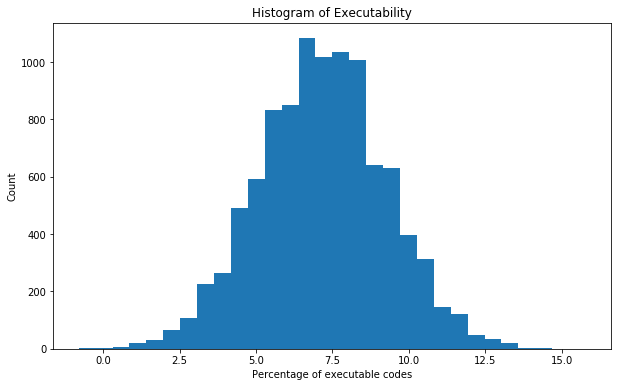

In [90]:
plt.figure(figsize=(10,6))
plt.title('Histogram of Executability')
plt.hist(per, 30)
plt.xlabel('Percentage of executable codes')
plt.ylabel('Count')

In [91]:
print(f'Mean: {np.mean(per)}')
print(f'standard deviation: {np.std(per)}')
p25 = np.percentile(per, 2.5)
p975 = np.percentile(per, 97.5)
print(f'95% CI: [{p25},{p975}]')

Mean: 7.16368
standard deviation: 2.0904317395217658
95% CI: [3.1000000000000014,11.299999999999997]


Text(0, 0.5, 'Probability Density')

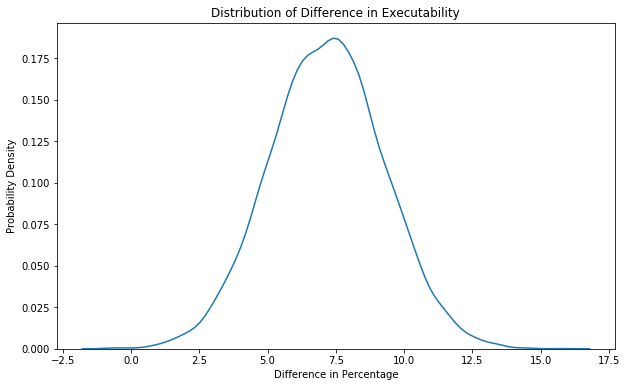

In [92]:
plt.figure(figsize=(10,6))
sns.distplot(per, hist=False)
# font = {'size': 16}
# fontt = {'size': 18}
font = {}
fontt = {}
plt.title('Distribution of Difference in Executability', fontdict=fontt)
plt.xlabel('Difference in Percentage', fontdict=font)
plt.ylabel('Probability Density', fontdict=font)

## Executability of AA vs non-AA

In [98]:
n = 10000
c = 1000
per = np.zeros(n)
for i in range(n):
    dfs_aa = df_aa.sample(c, replace=True)
    dfs_naa = df_naa.sample(c, replace=True)
    
    peraa = float(sum(dfs_aa[e])) / float(c) * 100
    pernaa = float(sum(dfs_naa[e])) / float(c) * 100
    
    per[i] = peraa - pernaa

Text(0, 0.5, 'Count')

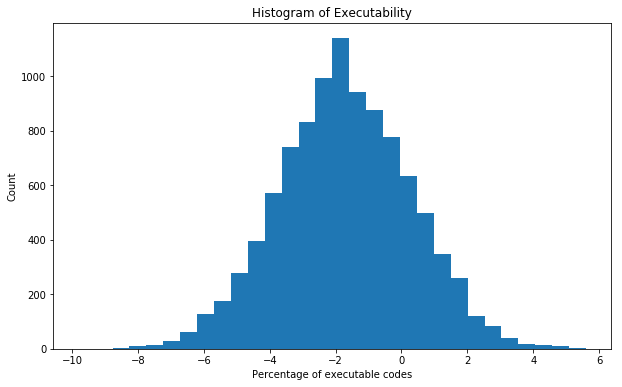

In [99]:
plt.figure(figsize=(10,6))
plt.title('Histogram of Executability')
plt.hist(per, 30)
plt.xlabel('Percentage of executable codes')
plt.ylabel('Count')

In [100]:
print(f'Mean: {np.mean(per)}')
print(f'standard deviation: {np.std(per)}')
p25 = np.percentile(per, 2.5)
p975 = np.percentile(per, 97.5)
print(f'95% CI: [{p25},{p975}]')

Mean: -1.727289999999999
standard deviation: 2.0025169801776954
95% CI: [-5.699999999999996,2.1999999999999957]


Text(0, 0.5, 'Probability Density')

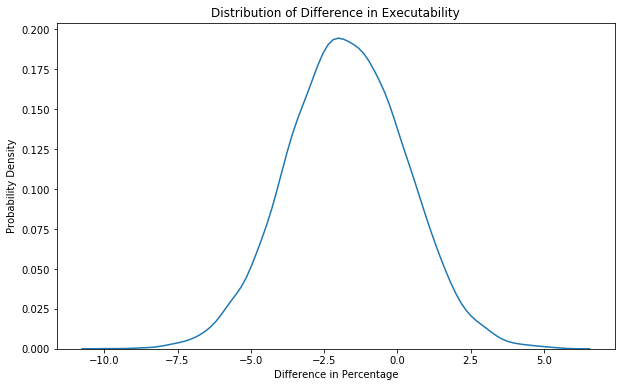

In [101]:
plt.figure(figsize=(10,6))
sns.distplot(per, hist=False)
# font = {'size': 16}
# fontt = {'size': 18}
font = {}
fontt = {}
plt.title('Distribution of Difference in Executability', fontdict=fontt)
plt.xlabel('Difference in Percentage', fontdict=font)
plt.ylabel('Probability Density', fontdict=font)

## Chi-Squared Test

In [159]:
counts_aa = pd.crosstab(index=df_aa[s2], columns="count")
counts_naa = pd.crosstab(index=df_naa[s2], columns="count")
df_counts = counts_aa.join(counts_naa, lsuffix='_aa', rsuffix='_naa').dropna()
df_counts = df_counts.loc[df_counts['count_aa'] > 20,:]
df_counts = df_counts.loc[df_counts['count_naa'] > 20,:]
df_counts.index.name = 'status_code'
df_counts.columns.name = ''
df_counts.to_csv('data4_p2_aa_chi.csv')
df_counts

,count_aa,count_naa
status_code,,
0,23857,45736.0
1,4354,7388.0
18,218,448.0
20,1842,3269.0
21,142,223.0
24,819,1785.0
25,1395,2224.0
27,88,175.0
28,48,61.0


In [160]:
counts_aa = pd.crosstab(index=df_aa[s3], columns="count")
counts_naa = pd.crosstab(index=df_naa[s3], columns="count")
df_counts = counts_aa.join(counts_naa, lsuffix='_aa', rsuffix='_naa').dropna()
df_counts = df_counts.loc[df_counts['count_aa'] > 20,:]
df_counts = df_counts.loc[df_counts['count_naa'] > 20,:]
df_counts.index.name = 'status_code'
df_counts.columns.name = ''
df_counts.to_csv('data4_p3_aa_chi.csv')
df_counts

,count_aa,count_naa
status_code,,
0,21537,40152.0
1,4903,8376.0
18,318,604.0
21,24,31.0
24,498,1215.0
25,191,316.0
27,66,100.0
28,48,55.0
30,29003,47101.0


In [158]:
counts_gh = pd.crosstab(index=df_gh[s2], columns="count")
counts_ngh = pd.crosstab(index=df_ngh[s2], columns="count")
df_counts = counts_gh.join(counts_ngh, lsuffix='_gh', rsuffix='_ngh').dropna()
df_counts = df_counts.loc[df_counts['count_gh'] > 20,:]
df_counts = df_counts.loc[df_counts['count_ngh'] > 20,:]
df_counts.index.name = 'status_code'
df_counts.columns.name = ''
df_counts.to_csv('data4_p2_gh_chi.csv')
df_counts

,count_gh,count_ngh
status_code,,
0,442,69151
1,39,11703
30,323,77348
35,345,80106
36,131,14611


In [161]:
counts_gh = pd.crosstab(index=df_gh[s3], columns="count")
counts_ngh = pd.crosstab(index=df_ngh[s3], columns="count")
df_counts = counts_gh.join(counts_ngh, lsuffix='_gh', rsuffix='_ngh').dropna()
df_counts = df_counts.loc[df_counts['count_gh'] > 20,:]
df_counts = df_counts.loc[df_counts['count_ngh'] > 20,:]
df_counts.index.name = 'status_code'
df_counts.columns.name = ''
df_counts.to_csv('data4_p3_gh_chi.csv')
df_counts

,count_gh,count_ngh
status_code,,
0,387,61302
1,45,13234
30,237,75867
35,561,96914
36,60,8168


## Student T-Test

In [177]:
# accepted answer
n = 20
c = 100
peraas = np.zeros(n)
pernaas = np.zeros(n)
for i in range(n):
    dfs_aa = df_aa.sample(c, replace=True)
    dfs_naa = df_naa.sample(c, replace=True)
    
    peraa = float(sum(dfs_aa[e])) / float(c) * 100
    pernaa = float(sum(dfs_naa[e])) / float(c) * 100
    
    peraas[i] = peraa
    pernaas[i] = pernaa
    
df = pd.DataFrame(data={'peraa': peraas, 'pernaa': pernaas})
df.to_csv('data4_aa_t.csv')

In [178]:
# Github Reference
n = 20
c = 100
perghs = np.zeros(n)
pernghs = np.zeros(n)
for i in range(n):
    dfs_gh = df_gh.sample(c, replace=True)
    dfs_ngh = df_ngh.sample(c, replace=True)
    
    pergh = float(sum(dfs_gh[e])) / float(c) * 100
    perngh = float(sum(dfs_ngh[e])) / float(c) * 100
    
    perghs[i] = pergh
    pernghs[i] = perngh
    
df = pd.DataFrame(data={'pergh': perghs, 'perngh': pernghs})
df.to_csv('data4_gh_t.csv')

In [179]:
# TEST!!!!!!
n = 20
c = 100
perghs = np.zeros(n)
pernghs = np.zeros(n)
for i in range(n):
    dfs_gh = df_aa.sample(c, replace=True)
    dfs_ngh = df_aa.sample(c, replace=True)
    
    pergh = float(sum(dfs_gh[e])) / float(c) * 100
    perngh = float(sum(dfs_ngh[e])) / float(c) * 100
    
    perghs[i] = pergh
    pernghs[i] = perngh
    
df = pd.DataFrame(data={'pergh': perghs, 'perngh': pernghs})
df.to_csv('data4_test_t.csv')

## Plot Executability over Time

In [180]:
import datetime

# Helper Functions
def add_three_months(t):
    for i in range(3):
        t = add_a_month(t)
    return t
def add_a_month(t):
    return (t.replace(day=1) + datetime.timedelta(days=31)).replace(day=1)
def print_time(t):
    return t.strftime("%Y-%m-%dT%H:%M:%S")

In [223]:
tag_counts = {}
tag_counts[e] = []
tag_counts[e2] = []
tag_counts[e3] = []
tag_counts['StartDate'] = []
tag_counts['EndDate'] = []
start_time = datetime.datetime.strptime(
        '2009-01-01 00:00:00', '%Y-%m-%d %H:%M:%S')
end_time = add_three_months(start_time)

while end_time < datetime.datetime.strptime(
    '2018-12-01 00:00:00', '%Y-%m-%d %H:%M:%S'):
    tag_counts['StartDate'].append(start_time)
    tag_counts['EndDate'].append(end_time)
    
    idxs = (df['creation_time'] > start_time) & (df['creation_time'] < end_time)
    dfs = df.loc[idxs,:]
    
    ex2 = sum(dfs.loc[:,e2]) / dfs.shape[0] * 100
    ex3 = sum(dfs.loc[:,e3]) / dfs.shape[0] * 100
    ex = sum(dfs.loc[:,e]) / dfs.shape[0] * 100
    tag_counts[e].append(ex)
    tag_counts[e2].append(ex2)
    tag_counts[e3].append(ex3)
    
    start_time = add_three_months(start_time)
    end_time = add_three_months(start_time)

Text(0, 0.5, 'Executability if Snippets')

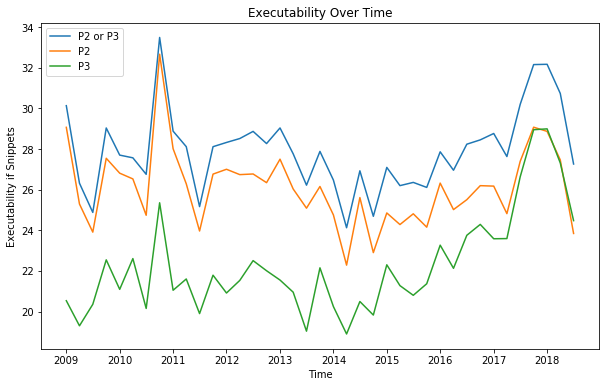

In [226]:
plt.figure(figsize=(10,6))
plt.plot(tag_counts['StartDate'], tag_counts[e], label='P2 or P3')
plt.plot(tag_counts['StartDate'], tag_counts[e2], label='P2')
plt.plot(tag_counts['StartDate'], tag_counts[e3], label='P3')
plt.legend()
plt.title('Executability Over Time')
plt.xlabel('Time')
plt.ylabel('Executability if Snippets')